In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd
import datetime
import my_tools as mt


df_cases_daily = mt.read_csv('cases_daily', 'daily cases')
df_cases_total = mt.read_csv('cases_total','Total cases')
df_cases_weekly = mt.read_csv('cases_weekly', 'New cases weekly')

df_deaths_daily = mt.read_csv('deaths_daily', 'daily deaths')
df_deaths_total = mt.read_csv('deaths_total', 'Total deaths')
df_deaths_weekly = mt.read_csv('deaths_weekly', 'New deaths weekly')

df_prevalence = mt.read_csv('prevalence', 'Prevalence')
df_incidence_daily = mt.read_csv('incidence_daily', 'Daily incidence')
df_incidence_weekly = mt.read_csv('incidence_weekly', 'Weekly incidence')
df_mortality = mt.read_csv('mortality', 'Mortality')

df_global = mt.read_csv('global', 'Global data')

df_thresholds = pd.read_csv('../data/thresholds.csv').set_index('ind')

countries = df_cases_daily.columns
dates = df_cases_daily.index
dates_weekly = df_cases_weekly.index

latest_date = dates[-1]

In [2]:
def plot_trends_dynamic(countries=[], log=True, glob=True, subject='impact', leg=True):
    fig = plt.figure(figsize=(17,9))
    ax = fig.add_subplot()
    plt.title('Trends (logarithmic scale)')
    
    if subject == 'impact':
        x = 'prevalence'
        y = 'incidence_weekly'
        
        ax.set_xlabel('Total cases / population')
        ax.set_ylabel('Weekly cases / population') 
    elif subject == 'spread':
        x = 'cases_total'
        y = 'cases_weekly'
        
        ax.set_xlabel('Total cases')
        ax.set_ylabel('Weekly cases') 
    
    if log:
        ax.set_xscale('log')
        ax.set_yscale('log')
    
    df_x_full = eval('df_' + x)
    df_y_full = eval('df_' + y)
    
    df_x_full = threshold_data(df_x_full, 'cases', 'weekly', reset=True)
    df_y_full = threshold_data(df_y_full, 'cases', 'weekly', reset=True)
    
    if countries == []:
        countries = df_prevelance.columns
        leg = False
    
    for i in range(len(df_x_full)):
        df_x = df_x_full.iloc[:i, :]
        df_y = df_y_full.iloc[:i, :]
        for country in countries:
            if leg:
                ax.plot(df_x[country], df_y[country], label=country)
            else:
                ax.plot(df_x[country], df_y[country])

        if glob:
            df_global_trends = df_global.loc[df_global['cases_total'] > 100]
            df_global_trends = df_global_trends.loc[df_cases_weekly.index, [x, y]]

            if leg: 
                ax.plot(df_global_trends[x], df_global_trends[y], label='Global')
            else:
                ax.plot(df_global_trends[x], df_global_trends[y])

        if leg:
            ax.legend(loc='upper left', frameon=False)

        ax.draw()
        ax.pause(0.01)

In [32]:

import time

def plot_trends_dynamically(countries=[]):
    %matplotlib notebook
    
    fig, axes = plt.subplots(ncols=1, figsize=(10,6))
    plt.ion()

    fig.show()
    fig.canvas.draw()

    leg = True
        
    df_x_full = df_prevalence
    df_y_full = df_incidence_weekly
    
    df_x_full = mt.threshold_data(df_x_full, 'cases', 'weekly', reset=False)
    df_y_full = mt.threshold_data(df_y_full, 'cases', 'weekly', reset=False)
    
    df_global_trends = df_global.loc[df_global['cases_total'] > 100]
    df_global_trends = df_global_trends.loc[df_cases_weekly.index, ['prevalence', 'incidence_weekly']]
    
    df_x_full['Global'] = df_global_trends['prevalence']
    df_y_full['Global'] = df_global_trends['incidence_weekly']
    
    countries.append('Global')
    
    for i in range(1, len(df_x_full)):
        axes.clear()
        
        df_x = df_x_full.ix[:i]
        df_y = df_y_full.ix[:i]
        
        axes.set_xlabel('Prevalence (total cases / population)')
        axes.set_ylabel('Incidence (weekly cases / population)') 

        axes.set_xscale('log')
        axes.set_yscale('log')

        plt.title('Trends (logarithmic scale)')
        
        for country in countries:
            if leg:
                axes.plot(df_x[country], df_y[country], label=country)
            else:
                axes.plot(df_x[country], df_y[country])

        if leg:
            axes.legend(loc='upper left', frameon=False)

        fig.canvas.draw()
        time.sleep(0.5)

<IPython.core.display.Javascript object>


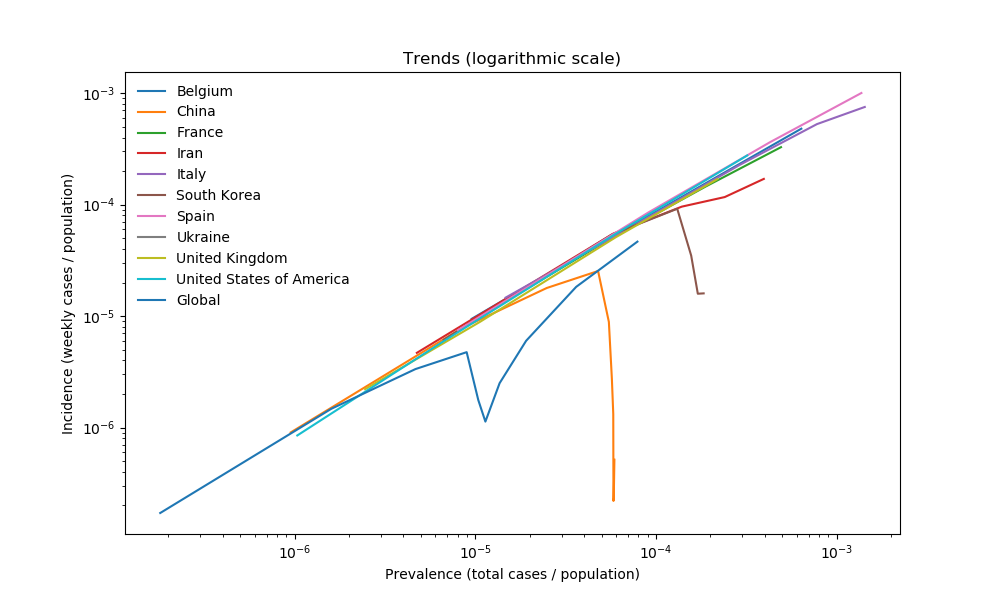

/home/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
/home/simon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


In [35]:
countries_of_interest = ['China', 'France', 'Italy', 'United States of America', 'Spain', 
                         'United Kingdom', 'Belgium', 'Iran', 'Ukraine', 'South Korea']


countries_of_interest.sort()

plot_trends_dynamically(countries_of_interest)

In [6]:
df_x_full = df_prevalence
df_y_full = df_incidence_weekly

df_x_full = mt.threshold_data(df_x_full, 'cases', 'weekly', reset=False)
df_y_full = mt.threshold_data(df_y_full, 'cases', 'weekly', reset=False)

df_global_trends = df_global.loc[df_global['cases_total'] > 100]
df_global_trends = df_global_trends.loc[df_cases_weekly.index, ['prevalence', 'incidence_weekly']]

In [7]:
df_x_full['global'] = df_global_trends['prevalence']

In [14]:
%matplotlib notebook
def test():
    fig, axes = plt.subplots(ncols=2, figsize=(9,5))
    plt.ion()

    fig.show()
    fig.canvas.draw()

    for iter_date in df_cases_daily.index:
        countries = mt.find_active(date=iter_date)

        for ax in axes.flatten():
            ax.clear()
            for label in ax.get_xticklabels():
                label.set_rotation(45)

        axes[0].bar(countries, df_cases_total.loc[iter_date][countries])
        axes[1].bar(countries, df_deaths_total.loc[iter_date][countries])

        fig.canvas.draw()

<IPython.core.display.Javascript object>


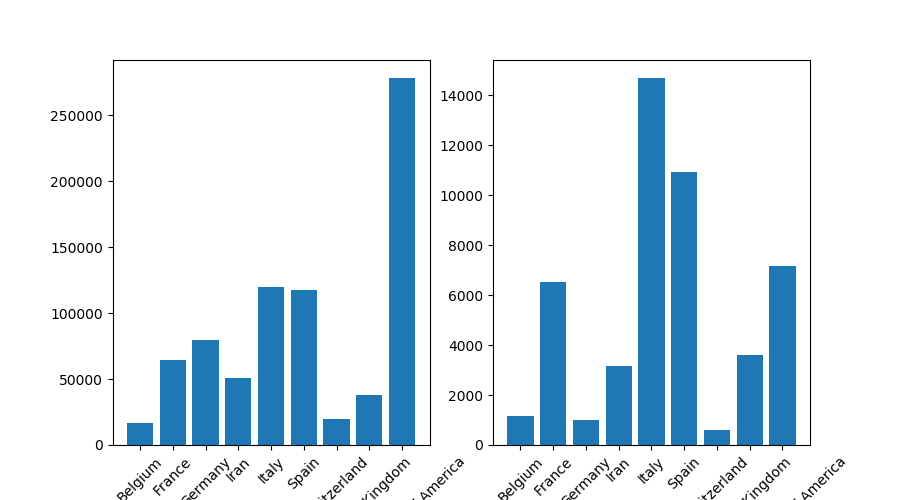

In [15]:
test()